# Chapter 4: The Characteristics of the Opportunity Set Under Risk

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['science', 'retro', 'grid'])

## Determining the Average Return

Let $R_{t}$ denote the return on a stock measured at time t relative to tiem t-1. Then we may give the average return as

$$\bar{R} = \sum_{t=1}^T \frac{R_t}{T} $$ 

where $R_t$ is given by

$$R_t = \frac{S_t - S_{t-1}}{S_{t-1}}$$

#### Example with NatWest stock

In [6]:
nwg_df = pd.read_csv('../data/yahoo/NWG.L.csv')
nwg_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-24,199.949997,200.000000,195.074997,197.750000,190.519653,29279556
1,2020-02-25,201.399994,202.199997,193.550003,195.100006,187.966553,30337607
2,2020-02-26,194.300003,195.399994,190.899994,193.050003,185.991501,27558821
3,2020-02-27,190.199997,190.949997,182.149994,183.399994,176.694321,30710076
4,2020-02-28,179.000000,180.500000,173.350006,178.649994,172.117996,43847533


In [24]:
def calc_return(price):
    return [0] + [(b-a)/a for (a, b) in zip(price, price[1:])]

In [16]:
nwg_df['Perc. Returns'] = calc_returns(nwg_df['Close'])

In [18]:
nwg_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Perc. Returns
0,2020-02-24,199.949997,200.000000,195.074997,197.750000,190.519653,29279556,0.000000
1,2020-02-25,201.399994,202.199997,193.550003,195.100006,187.966553,30337607,-0.013401
2,2020-02-26,194.300003,195.399994,190.899994,193.050003,185.991501,27558821,-0.010507
3,2020-02-27,190.199997,190.949997,182.149994,183.399994,176.694321,30710076,-0.049987
4,2020-02-28,179.000000,180.500000,173.350006,178.649994,172.117996,43847533,-0.025900


## Variance - A measure of dispersion

An investor is inclined towards high returns but adverse to high risk. We therfore need a measure of risk. Variance gives us a way to do just that.

$$\sigma^2 = \sum_{t=1}^{T} \frac{(R_t - \bar{R)}}{T}$$

#### Example with NatWest stock

In [31]:
def calc_average(returns):
    # -1 because first row contains no return information
    return sum(returns)/(len(returns)-1)

In [32]:
av = calc_average(nwg_df['Perc. Returns'])
av

0.0003767706254256973

In [28]:
def calc_variance(returns):
    R̄ = calc_average(returns)
    return sum([(R - R̄)**2 for R in returns[1:]]) / len(returns-1)

In [40]:
var = calc_variance(nwg_df['Perc. Returns'])
var

0.0012095536716915081

## Variance of Combinations of Assets

The choices to an investor are not simply to pick between a number of assets but how they may allocate investment amongst them. The risk of a combination of assests is very different to the risk on a single asset.

#### Retrun on a portfolio

First we mention the return on a portfolio. The return on the portfolio is simply the weighted average of the return on the individual assets. Let i index the asset then

$$ \bar{R_\pi} = \sum_{i=1}^{N}X_i \bar{R_i} $$

#### Variance on a portfolio

The variance on a portfolio is less simple. It is the expected value of the square deviations of the return on the portfolio from the mean on the portfolio.

$$\sigma_{\pi}^2 = E[(R_\pi - \bar{R}_{\pi})^2]$$

It is instructive to carry out analysis on two stocks

$$\sigma_{\pi}^2 = E[(X_1 R_1 + X_2 R_2 - X_1 \bar{R}_1 -  X_2 \bar{R}_2)^2]$$

$$\sigma_{\pi}^2 = E[((X_1(R_1 - \bar{R}_1) + X_2 (R_2  -  \bar{R}_2))^2]$$

$$\sigma_{\pi}^2 = E[X_1^2(R_1 - \bar{R}_1)^2 +  2 X_1 X_2 (R_1 - \bar{R}_1)(R_2 - \bar{R}_2) + X_2^2(R_2  -  \bar{R}_2)]$$

$$\sigma_{\pi}^2 = X_1 ^2 E[(R_1 - \bar{R}_1)^2] +  2 X_1 X_2 E[( R_1 - \bar{R}_1)(R_2 - \bar{R}_2)] + X_2^2E[(R_2  - \bar{R}_2)]$$

$$\sigma_{\pi}^2 = X_1^2\sigma_1^2 + 2 X_1 X_2 \sigma_{12}^2 + X_2^2\sigma_2^2$$

#### Example with NatWest and EasyJet Stock

In [42]:
ezj_df = pd.read_csv('../data/yahoo/EZJ.L.csv')
ezj_df['Perc. Returns'] = calc_returns(ezj_df['Close'])
ezj_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Perc. Returns
0,2020-03-02,1141.500000,1146.0,1030.000000,1062.5,1062.5,5705383,0.000000
1,2020-03-03,1085.000000,1115.5,1070.000000,1070.0,1070.0,3372599,0.007059
2,2020-03-04,1077.500000,1089.5,1041.000000,1057.5,1057.5,3002244,-0.011682
3,2020-03-05,1071.000000,1090.5,1008.500000,1010.5,1010.5,2291729,-0.044444
4,2020-03-06,981.200012,1005.0,946.400024,1000.0,1000.0,7187572,-0.010391


In [50]:
def calc_covariance(returns1, returns2):
    R̄_1 = calc_average(returns1)
    R̄_2 = calc_average(returns2)
    
    disp = [(a - R̄_1)*(b - R̄_2) for (a,b) in zip(returns1[1:], returns2[1:])]
    return sum(disp)/len(disp)

In [51]:
covar = calc_covariance(nwg_df['Perc. Returns'], ezj_df['Perc. Returns'])
covar

5.7140875127572214e-05

In [62]:
def calc_portfolio_var(x1, returns1, x2, returns2):
    var1 = calc_variance(returns1)
    var2 = calc_variance(returns2)
    
    covar = calc_covariance(returns1, returns2)
    
    
    return x1**2*var1 + 2*x1*x2*covar + x2**2*var2    

In [64]:
σ_π = calc_portfolio_var(0.5, nwg_df['Perc. Returns'], 0.5, ezj_df['Perc. Returns'])
σ_π

0.0011096205134978683

## Reducing Risk: Without Correlation 


In [3]:
variances = np.random.rand(100)

In [4]:
π_vars = []
for i in range(1, len(variances)):
    vs = variances[:i]
    v = vs.sum()/i**2
    π_vars.append(v)

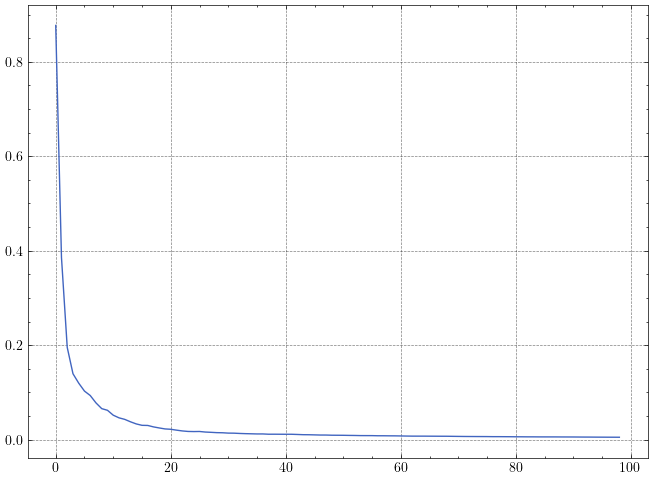

In [5]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(np.arange(0,99), π_vars)

## Reducing Risk: With Correlation 

In [6]:
N = 1000
A = np.random.rand(N, N)/10
Σ = np.dot(A, A.transpose())

In [7]:
π_vars = []
for i in range(2, N):
    σs = Σ[:i, :i]
    a = σs[np.eye(σs.shape[0],dtype=bool)].sum()/i**2
    b = σs[~np.eye(σs.shape[0],dtype=bool)].sum()/(i**2)
    tot = a + b
    π_vars.append(tot)

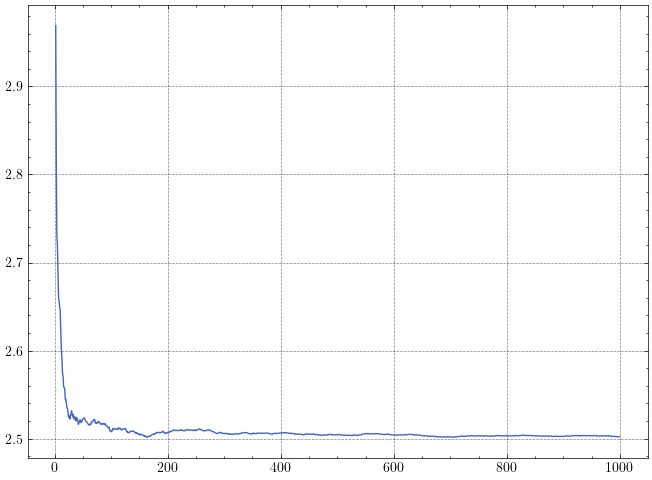

In [9]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(np.arange(2, N), π_vars)

In [11]:
σs[~np.eye(σs.shape[0],dtype=bool)].sum()/(1000*999)

2.4962060844130973

In [131]:
Σ[~np.eye(Σ.shape[0],dtype=bool)].sum()/100**2

-0.022821896040636593

## Bond Stock Allocation

In [11]:
# stock statistics
r_s = 0.118 
σ_s = 0.203

# bond statistics
r_b = 0.064
σ_b = 0.084

# correlation coefficient
ρ_sb = 0.01

In [12]:
def calc_π_r(r_i, x_i, r_j, x_j):
    assert x_i + x_j == 1
    
    return r_i*x_i + r_j*x_j

In [13]:
def calc_π_σ(σ_i, x_i, σ_j, x_j, ρ_ij):
    assert x_i + x_j == 1
    
    σ_p_sqrd = σ_i**2*x_i**2 + σ_j**2*x_j**2 + 2*σ_i*σ_j*x_i*x_j*ρ_ij
    return np.sqrt(σ_p_sqrd)

In [14]:
r_p = []
σ_p = []

for x_b in np.arange(0,1.1, 0.1):
    x_s = 1-x_b
    r_p.append(calc_π_r(r_b, x_b, r_s, x_s)*1e2)
    σ_p.append(calc_π_σ(σ_b, x_b, σ_s, x_s, ρ_sb)*1e2)

Text(13, 12, 'Stocks')

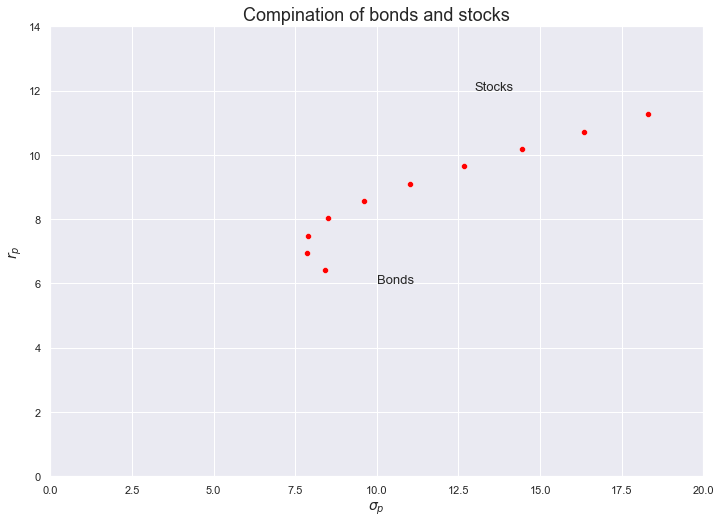

In [15]:
plt.title('Compination of bonds and stocks', size = 18)
sns.scatterplot(x=σ_p, y=r_p, color='red')
plt.ylim(0, 14)
plt.xlim(0, 20)
plt.ylabel('$r_p$', size=14)
plt.xlabel('$\sigma_p$', size=14)
plt.text(10, 6, 'Bonds', size=13)
plt.text(13, 12, 'Stocks', size=13)